In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap

# Decision thresholds

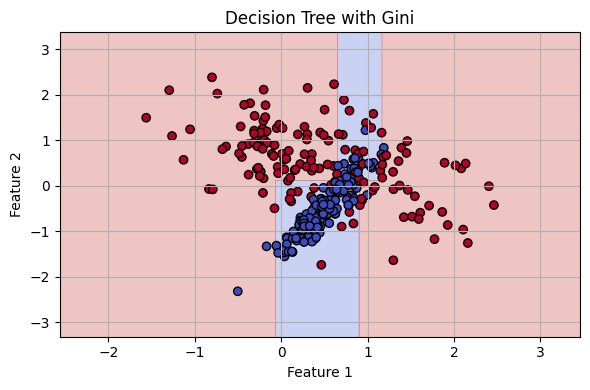

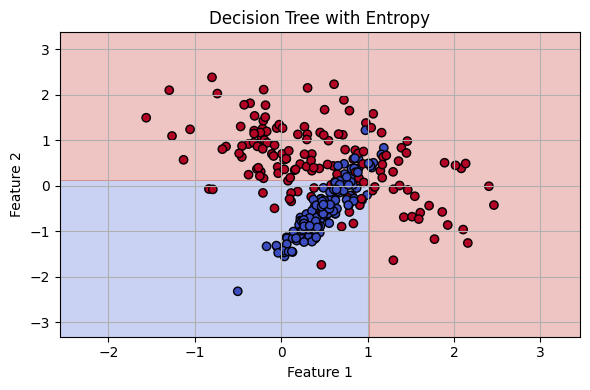

Accuracy (Gini): 0.88
Accuracy (Entropy): 0.86


In [2]:
# Create synthetic dataset (2D for visualization)
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=0.5, random_state=42
)

# Train classifiers
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

clf_gini.fit(X, y)
clf_entropy.fit(X, y)

# Define function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot both trees
plot_decision_boundary(clf_gini, X, y, "Decision Tree with Gini")
plot_decision_boundary(clf_entropy, X, y, "Decision Tree with Entropy")

# Compare performance
print(f"Accuracy (Gini): {accuracy_score(y, clf_gini.predict(X)):.2f}")
print(f"Accuracy (Entropy): {accuracy_score(y, clf_entropy.predict(X)):.2f}")

In [3]:
print(classification_report(clf_gini.predict(X), y))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       177
           1       0.79      0.96      0.86       123

    accuracy                           0.88       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300



In [4]:
print(classification_report(clf_entropy.predict(X), y))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       153
           1       0.85      0.87      0.86       147

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



# Random Forest and Gradient Boost Trees

Random Forest training time: 0.0583 seconds
XGBoost training time: 0.0813 seconds
=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       249
           1       0.92      0.89      0.91       251

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       249
           1       0.97      0.92      0.94       251

    accuracy                           0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



/Users/adan.mora/Desktop/code/university/machine-learning-advance-course/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


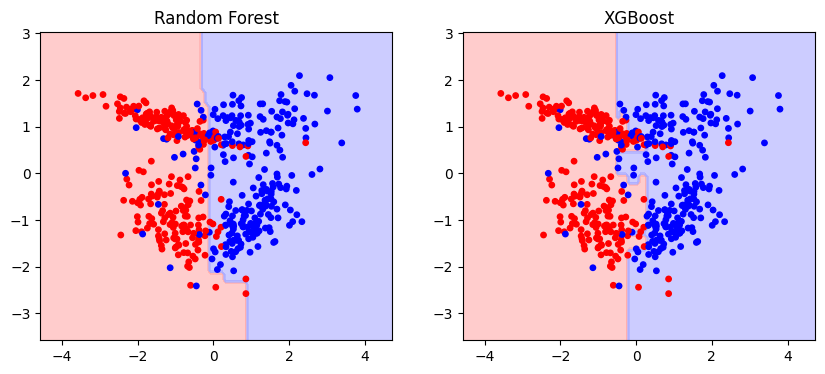

In [5]:
# Create a simple 2D dataset
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=2, class_sep=1, random_state=21
)

# Train classifiers
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=21)
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, 
                    use_label_encoder=False, eval_metric='logloss', random_state=21)

start_time_rf = time.perf_counter()
rf.fit(X, y)
print(f"Random Forest training time: {time.perf_counter() - start_time_rf:.4f} seconds")

start_time_rf = time.perf_counter()
xgb.fit(X, y)
print(f"XGBoost training time: {time.perf_counter() - start_time_rf:.4f} seconds")

# Predictions on training data
y_pred_rf = rf.predict(X)
y_pred_xgb = xgb.predict(X)

# Classification Reports
print("=== Random Forest Classification Report ===")
print(classification_report(y, y_pred_rf))

print("=== XGBoost Classification Report ===")
print(classification_report(y, y_pred_xgb))

# Mesh grid for decision boundary plot
h = 0.1  # grid step
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predictions for decision boundary
Z_rf = rf.predict(grid).reshape(xx.shape)
Z_xgb = xgb.predict(grid).reshape(xx.shape)

# Plot decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].contourf(xx, yy, Z_rf, cmap=cmap_light, alpha=0.6)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=15)
axes[0].set_title("Random Forest")

axes[1].contourf(xx, yy, Z_xgb, cmap=cmap_light, alpha=0.6)
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=15)
axes[1].set_title("XGBoost")

plt.show()
